In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
ins_df = pd.read_csv("/content/Health.csv")

In [3]:
ins_df.head()

,age,sex,bmi,steps,children,smoker,region,insuranceclaim
0,19,0,27.900,3009,0,1,3,1
1,18,1,33.770,3008,1,0,2,1
2,28,1,33.000,3009,3,0,2,0
3,33,1,22.705,10009,0,0,1,0
4,32,1,28.880,8010,0,0,1,1


In [4]:
ins_df.shape

(1338, 8)

In [5]:

ins_df.describe(include = "all")

,age,sex,bmi,steps,children,smoker,region,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,1.000000


In [6]:
duplicate = ins_df.duplicated()
duplicate.sum()

0

In [7]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 83.8 KB


In [8]:
ins_df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
insuranceclaim    0
dtype: int64

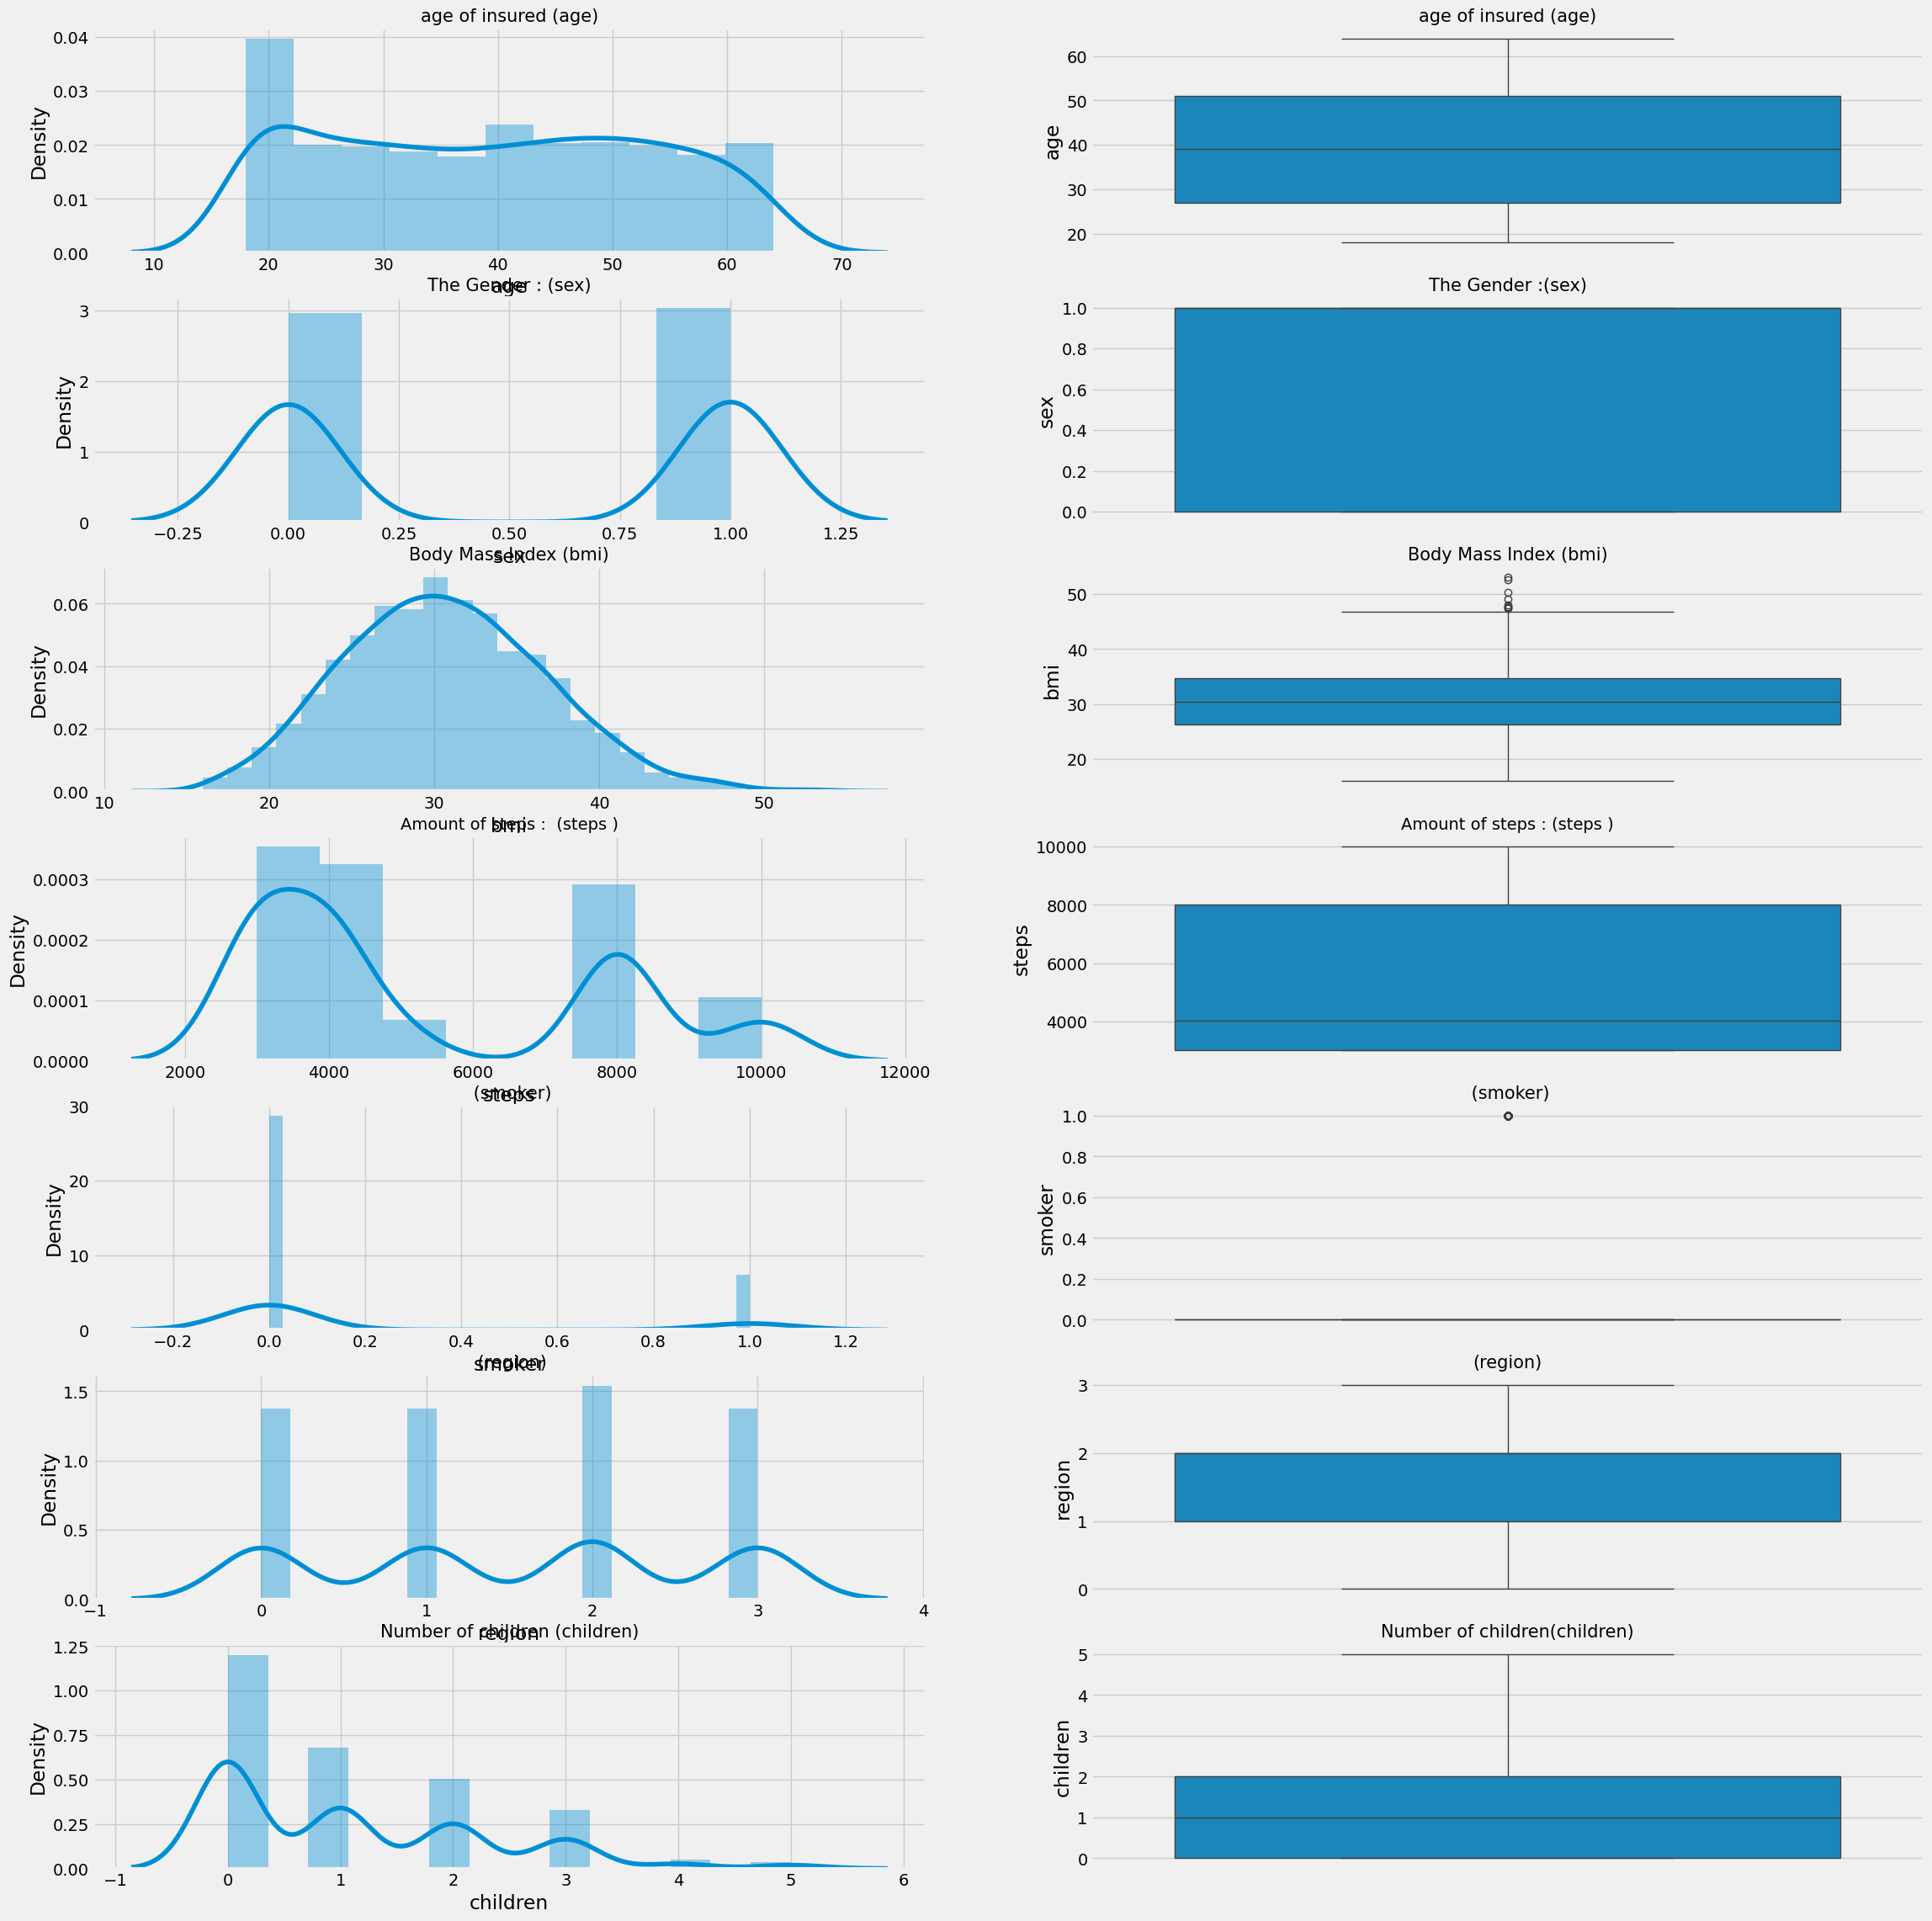

In [9]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 27)
a = sns.distplot(ins_df['age'] , ax=axes[0][0])
a.set_title("age of insured (age)",fontsize=15)
a = sns.boxplot(ins_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age of insured (age)",fontsize=15)

a = sns.distplot(ins_df['sex'] , ax=axes[1][0])
a.set_title("The Gender : (sex)",fontsize=15)


a = sns.boxplot(ins_df['sex'] , orient = "v" , ax=axes[1][1])
a.set_title("The Gender :(sex)",fontsize=15)

a = sns.distplot(ins_df['bmi'] , ax=axes[2][0])
a.set_title("Body Mass Index (bmi)",fontsize=15)

a = sns.boxplot(ins_df['bmi'] , orient = "v" , ax=axes[2][1])
a.set_title("Body Mass Index (bmi)",fontsize=15)


a = sns.distplot(ins_df['steps'] ,ax=axes[3][0])
a.set_title("Amount of steps :  (steps )",fontsize=14)

a = sns.boxplot(ins_df['steps'] , orient = "v" , ax=axes[3][1])
a.set_title("Amount of steps : (steps )",fontsize=14)
a = sns.distplot(ins_df['smoker'] , ax=axes[4][0])
a.set_title(" (smoker)",fontsize=15)

a = sns.boxplot(ins_df['smoker'] , orient = "v" , ax=axes[4][1])
a.set_title(" (smoker)",fontsize=15)
a = sns.distplot(ins_df['region'] , ax=axes[5][0])
a.set_title(" (region)",fontsize=15)

a = sns.boxplot(ins_df['region'] , orient = "v" , ax=axes[5][1])
a.set_title("(region)",fontsize=15)
a = sns.distplot(ins_df['children'] , ax=axes[6][0])
a.set_title("Number of children (children)",fontsize=15)

a = sns.boxplot(ins_df['children'] , orient = "v" , ax=axes[6][1])
a.set_title("Number of children(children)",fontsize=15)
plt.show();

In [10]:
# fig,axes = plt.subplots(nrows=2,ncols=3)
# fig.set_size_inches(32, 28)

# a = sns.countplot(data = ins_df, x ='Product Name',ax=axes[0][0])

# a.set_title("Name of the tour insurance products (Product)",fontsize=15)

# a = sns.boxplot(data = ins_df, x='Product Name',y='steps ', hue='Claimed', ax=axes[0][1])
# a.set_title("Name of the tour insurance products (Product)",fontsize=35)

# a = sns.violinplot(data = ins_df, x = 'Product Name',y='steps ',hue='Claimed', ax=axes[0][2])

# a.set_title("Name of the tour insurance products (Product)",fontsize=15)


# a = sns.countplot(data = ins_df, x ='Destination',ax=axes[1][0])
# a.set_title("Destination of the tour (Destination)",fontsize=15)
# a = sns.boxplot(data = ins_df, x='Destination',y='steps ', hue='Claimed', ax=axes[1][1])
# a.set_title("Destination of the tour (Destination)",fontsize=35)
# a = sns.violinplot(data = ins_df, x = 'Destination',y='steps ',hue='Claimed', ax=axes[1][2])
# a.set_title("Destination of the tour (Destination)",fontsize=15)

# plt.show();

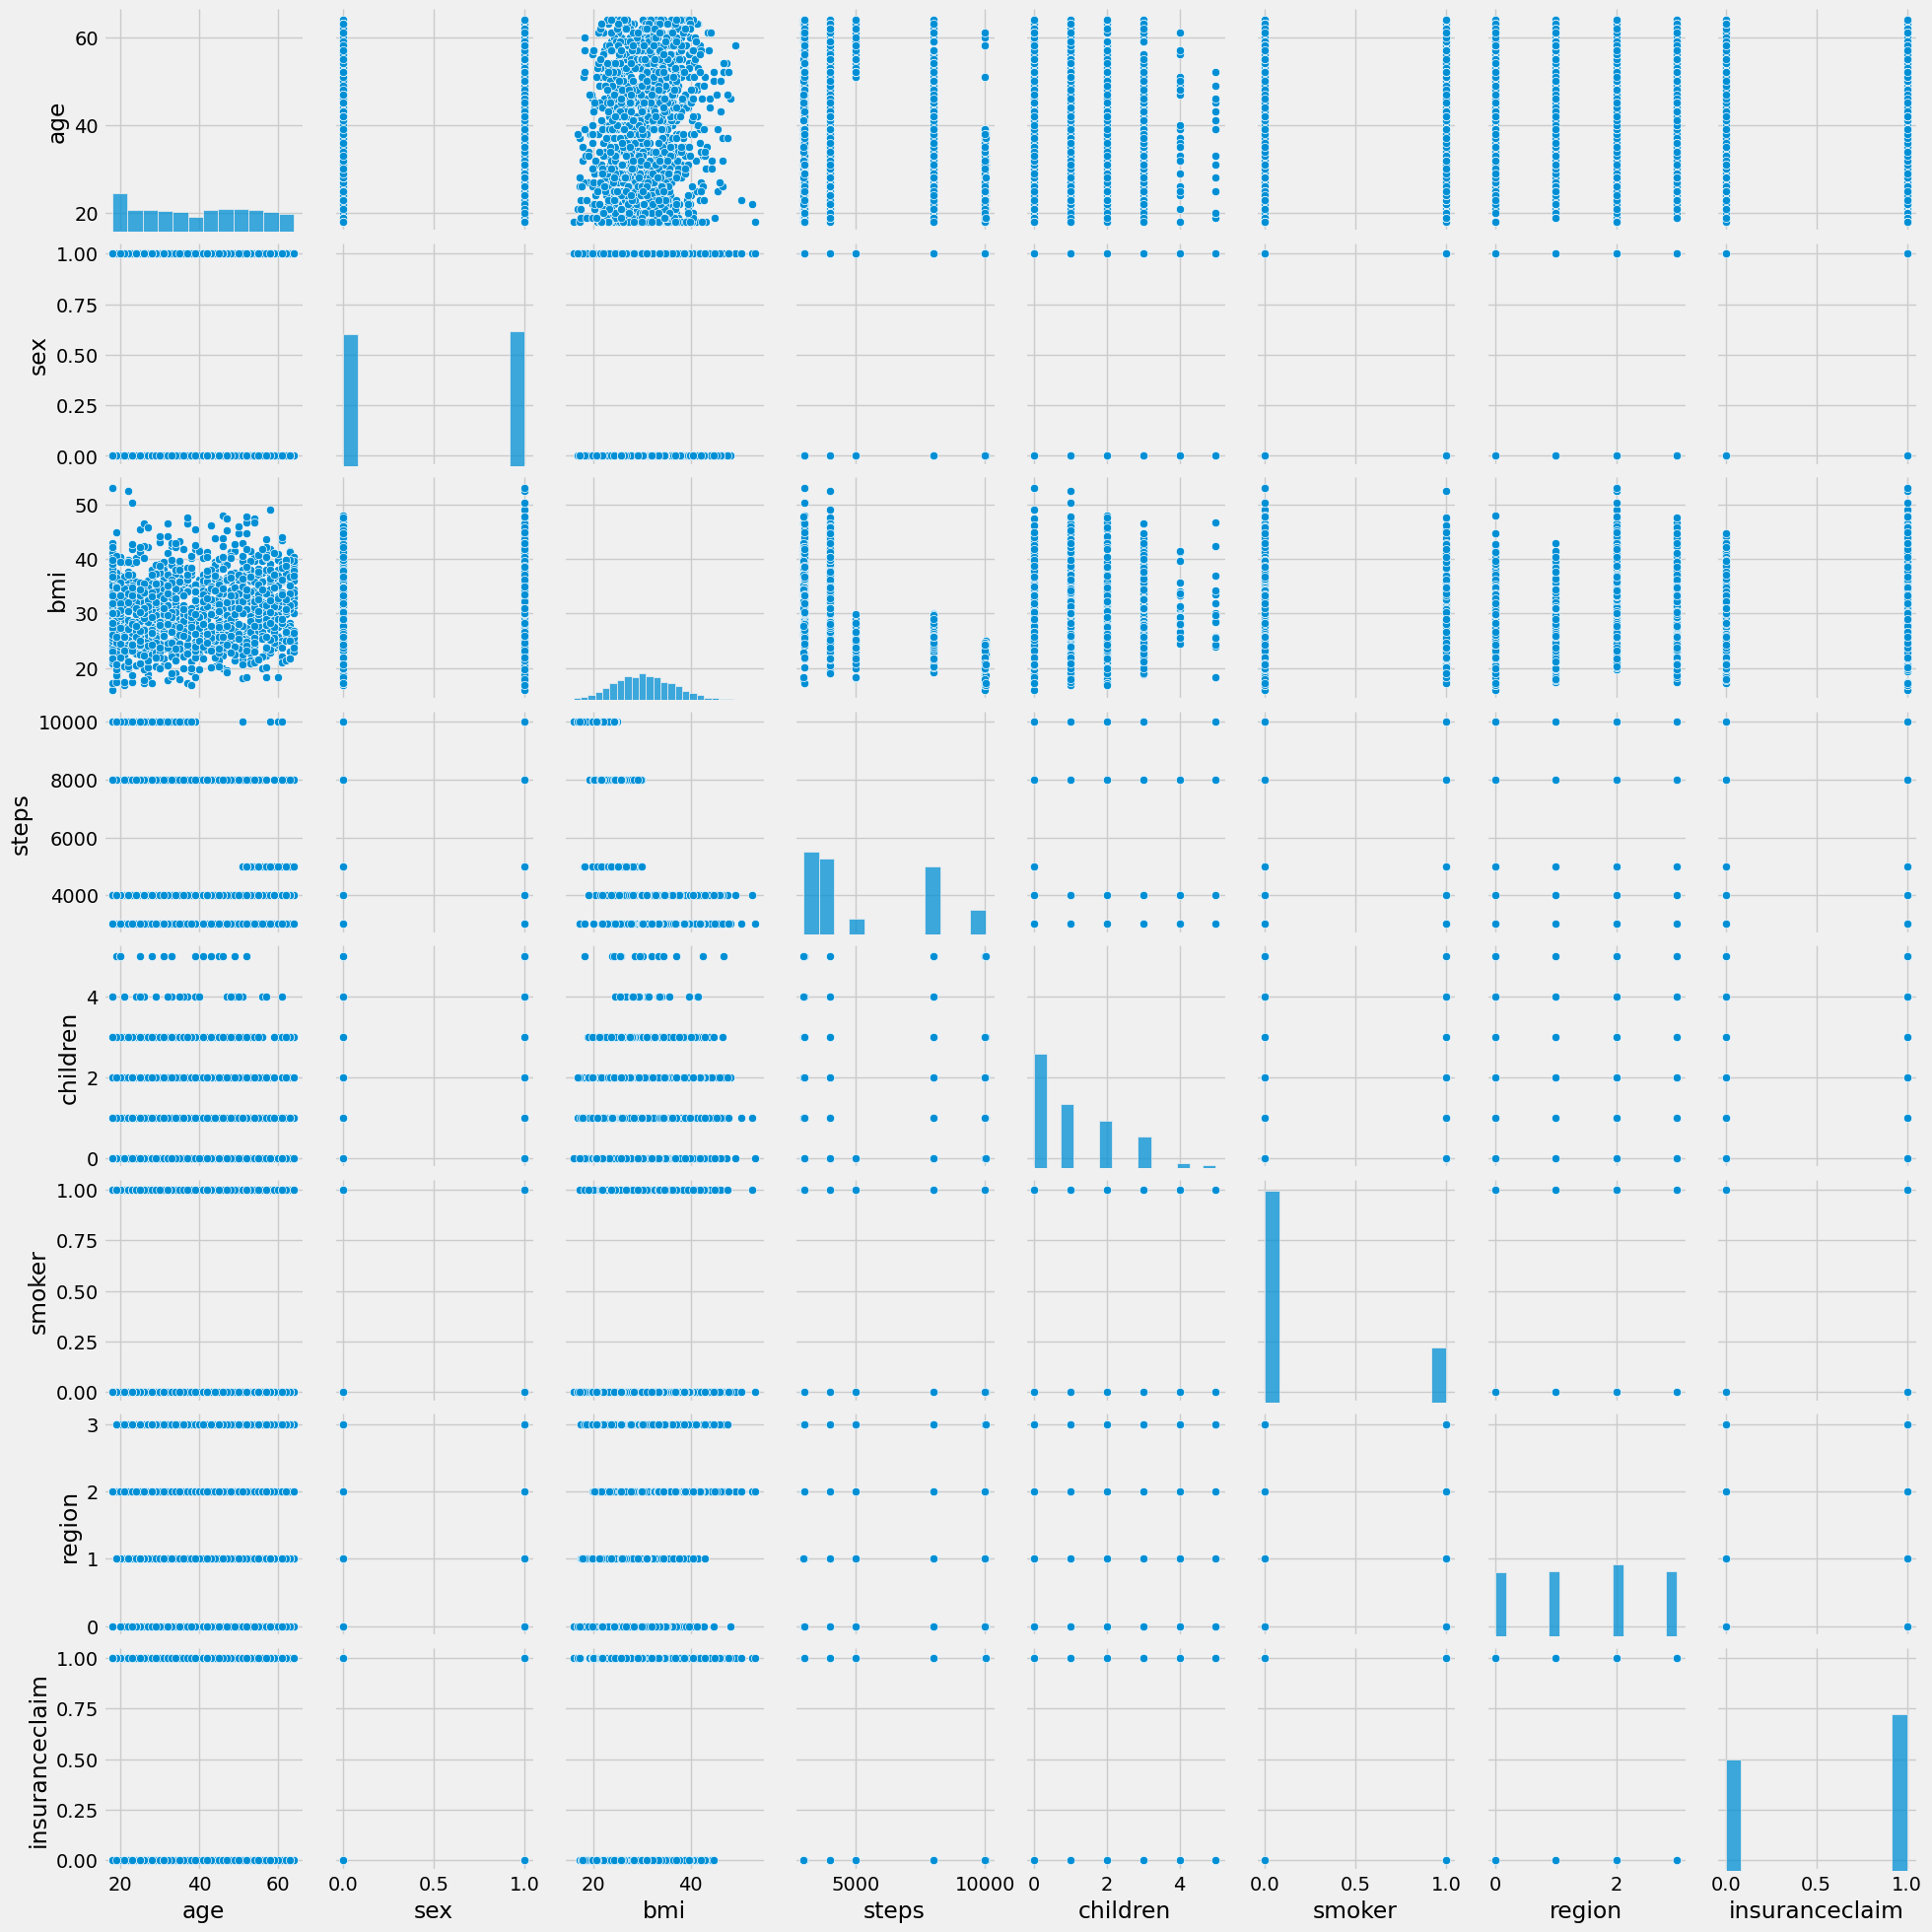

In [11]:
sns.pairplot(ins_df);

In [12]:
corr = ins_df.corr()
corr

,age,sex,bmi,steps,children,smoker,region,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,0.020891
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,1.000000


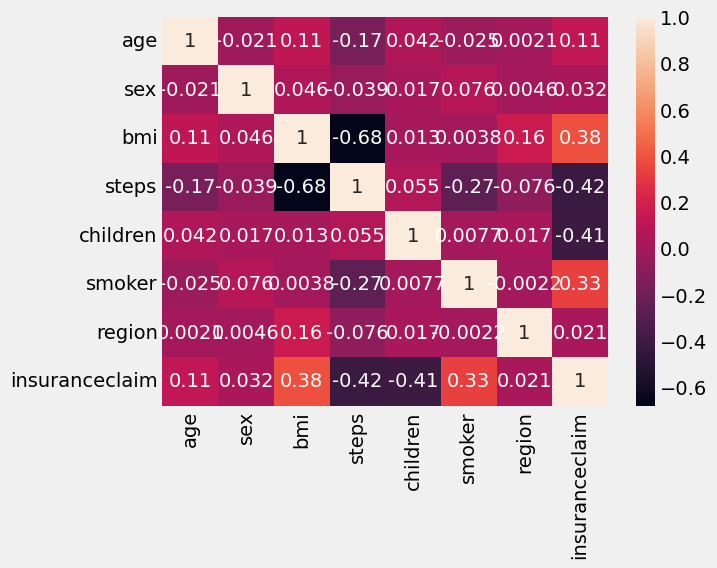

In [13]:
sns.heatmap(corr,annot=True);

In [14]:
print('age \n',ins_df.age.value_counts())
print('\n')
print('sex \n',ins_df.sex.value_counts())
print('\n')
print('Children \n',ins_df.children.value_counts())
print('\n')
print('bmi \n',ins_df.bmi.value_counts())
print('\n')
print('steps  \n',ins_df.steps.value_counts())
print('\n')
print('region \n',ins_df["region"].value_counts())
print('\n')


age 
 age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex 
 sex
1    676
0    662
Name: count, dtype: int64


Children 
 children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


bmi 
 bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


steps  
 steps
8008     52
3008     49
3000     42
4000     42
4005     41
3009     40
4007     39
3006     39
3003     38
3004     38
3002     38
4009     36
3007     35
8009     35
4002

In [15]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insuranceclaim'],
      dtype='object')

In [16]:
ins_df.head()

,age,sex,bmi,steps,children,smoker,region,insuranceclaim
0,19,0,27.900,3009,0,1,3,1
1,18,1,33.770,3008,1,0,2,1
2,28,1,33.000,3009,3,0,2,0
3,33,1,22.705,10009,0,0,1,0
4,32,1,28.880,8010,0,0,1,1


In [17]:
print(ins_df.insuranceclaim.value_counts(normalize=True))
print('%0s',ins_df.insuranceclaim.value_counts()[0],'\n','%1s',ins_df.insuranceclaim.value_counts()[1])

insuranceclaim
1    0.585202
0    0.414798
Name: proportion, dtype: float64
%0s 555 
 %1s 783


In [18]:
ld_df = ins_df

In [19]:
X = ld_df.drop("insuranceclaim", axis=1)

y = ld_df.pop("insuranceclaim")

X.head()

,age,sex,bmi,steps,children,smoker,region
0,19,0,27.900,3009,0,1,3
1,18,1,33.770,3008,1,0,2
2,28,1,33.000,3009,3,0,2
3,33,1,22.705,10009,0,0,1
4,32,1,28.880,8010,0,0,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [21]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (936, 7)
X_test (402, 7)
train_labels (936,)
test_labels (402,)
Total Obs 3000


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,
                              max_features=4,
                              random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [23]:
rfcl

RandomForestClassifier(max_features=4, random_state=1)

In [24]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [25]:
rfcl.score(X_train,train_labels)

1.0

In [26]:
from sklearn.metrics import classification_report
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       538

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.98      0.99      0.98       245

    accuracy                           0.98       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.98      0.98      0.98       402



In [27]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,6],
    'max_features': [4,5],
    'min_samples_leaf': [11,15],
    'min_samples_split': [50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2)

In [28]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [11, 15],
                         'min_samples_split': [50, 55],
                         'n_estimators': [290, 350, 400]})

In [29]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 11,
 'min_samples_split': 50,
 'n_estimators': 290}

In [30]:
best_grid = grid_search.best_estimator_

In [31]:
ytrain_predict2 = best_grid.predict(X_train)
ytest_predict2 = best_grid.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict2))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict2))

Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       398
           1       0.94      0.94      0.94       538

    accuracy                           0.93       936
   macro avg       0.93      0.93      0.93       936
weighted avg       0.93      0.93      0.93       936

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       157
           1       0.94      0.89      0.91       245

    accuracy                           0.90       402
   macro avg       0.89      0.90      0.89       402
weighted avg       0.90      0.90      0.90       402



In [33]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,6],
    'max_features': [4,5],
    'min_samples_leaf': [11,15],
    'min_samples_split': [50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2)

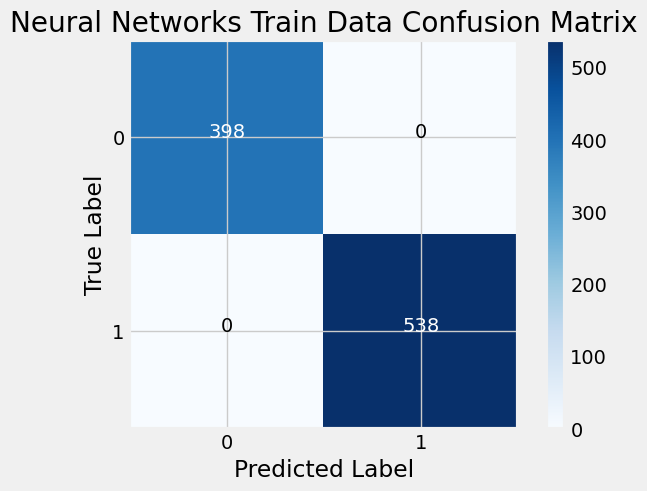

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(train_labels, ytrain_predict)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Train Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(test_labels)))
plt.xticks(tick_marks, np.unique(test_labels))
plt.yticks(tick_marks, np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


plt.show()

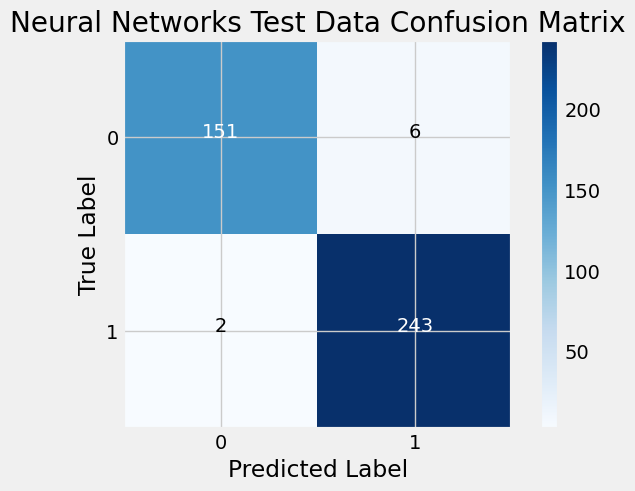

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(test_labels, ytest_predict)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(test_labels)))
plt.xticks(tick_marks, np.unique(test_labels))
plt.yticks(tick_marks, np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


plt.show()

In [36]:
best_grid.score(X_test,test_labels)

0.8980099502487562

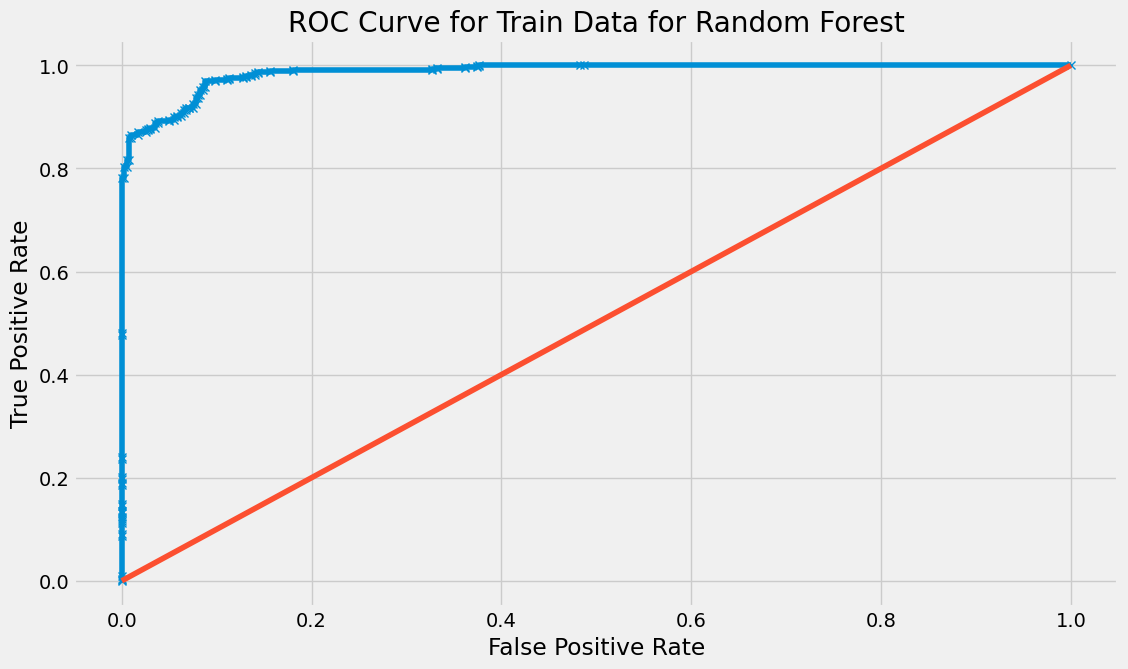

Area under Curve is 0.9867740187928491


In [37]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

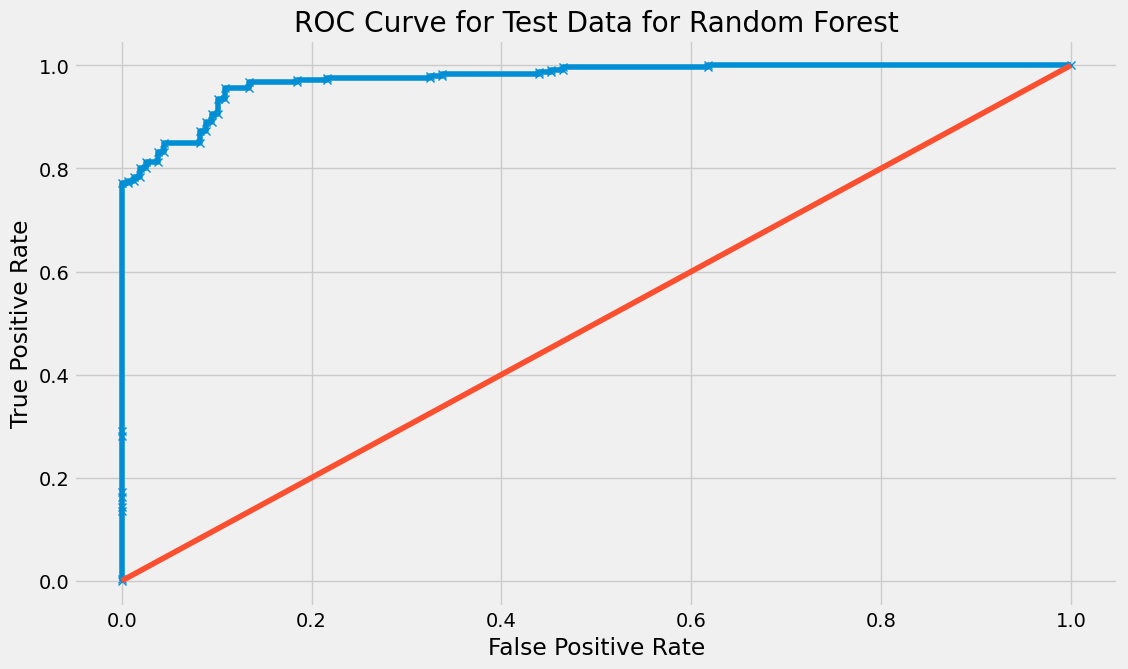

Area under Curve is 0.9735343819056285


In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

In [39]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,
                    random_state=1,tol=0.01)

In [40]:
clf.fit(X_train,train_labels)

Iteration 1, loss = 11.86181963
Iteration 2, loss = 0.70576882
Iteration 3, loss = 0.70731896
Iteration 4, loss = 0.70829174
Iteration 5, loss = 0.70882695
Iteration 6, loss = 0.70890199
Iteration 7, loss = 0.70884436
Iteration 8, loss = 0.70857959
Iteration 9, loss = 0.70824145
Iteration 10, loss = 0.70785622
Iteration 11, loss = 0.70740780
Iteration 12, loss = 0.70702521
Iteration 13, loss = 0.70664545
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [41]:
y_pred2 = clf.predict(X_test)
x_pred2 = clf.predict(X_train)

In [42]:
clf.score(X_train,train_labels)

0.4252136752136752

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(train_labels, x_pred2))
print(classification_report(test_labels, y_pred2))


              precision    recall  f1-score   support

           0       0.43      1.00      0.60       398
           1       0.00      0.00      0.00       538

    accuracy                           0.43       936
   macro avg       0.21      0.50      0.30       936
weighted avg       0.18      0.43      0.25       936

              precision    recall  f1-score   support

           0       0.39      1.00      0.56       157
           1       0.00      0.00      0.00       245

    accuracy                           0.39       402
   macro avg       0.20      0.50      0.28       402
weighted avg       0.15      0.39      0.22       402



In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   steps     1338 non-null   int64  
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 73.3 KB


In [46]:
new_data = np.array([[36, 1, 28.45, 5055, 2, 1, 3]])


predicted_claimed_status = best_grid.predict(new_data)

print("Predicted Claimed status:", predicted_claimed_status)#END

Predicted Claimed status: [1]
